In [2]:
import os
import torch
import torchvision
import torch.nn as nn
import pickle
import pylab
import numpy as np
import scipy
import torch.optim as optim
import pandas as pd
import torchvision.datasets as datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import shapiro, normaltest

from torchvision import transforms

from copy import deepcopy

# Local imports
from local_models import *
from helper_functions import *
from piece_hurdle_model import *

from IPython.display import Image

from PIL import Image

# torch.autograd.set_detect_anomaly(True)
%load_ext autoreload
%autoreload 2


d:\Master_ML\iml\AAAI-2021\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
G_Fashion, cnn_Fashion = load_models_Fashion(CNN, Generator)
train_loader_fashion, test_loader_fashion = load_dataloaders_fashion()

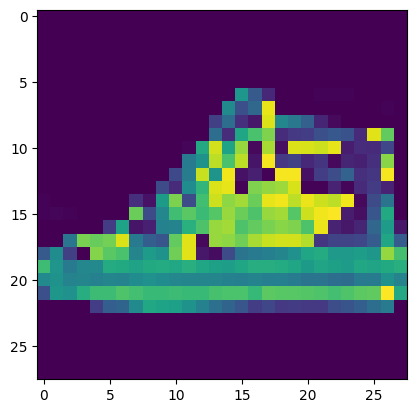

In [4]:
png_path = 'data\\incorrect_img\\incorrect_img\\true_label_Ankle Boot_predicted_label_Sneaker_16.png'
original_query_img_fashion = load_png_as_mnist_format(png_path)
plt.imshow(original_query_img_fashion.detach().squeeze().numpy())

In [5]:
target_class_fashion = np.float64(9)
output_label(int(target_class_fashion))

'Ankle Boot'

In [6]:
original_query_pred_fashion = int(torch.argmax(cnn_Fashion(original_query_img_fashion)[0]))
original_query_pred_fashion

7

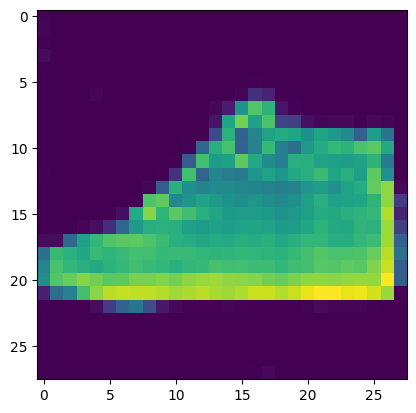

In [7]:
z = torch.load('data\\true_label_Ankle_Boot_predicted_label_Sneaker_16.pt', map_location='cpu')
output = G_Fashion(z)
img_GANs = output.detach().squeeze().numpy()
plt.imshow(img_GANs)

In [8]:
query_x = cnn_Fashion(G_Fashion(z))[1][0]
query_x.shape

torch.Size([128])

In [9]:
with open('data/pred_features_fashion.pickle', 'rb') as handle:
    dist_data_overview = pickle.load(handle)

In [12]:
dist_data_overview[0].keys()

dict_keys(['activations'])

In [32]:
#### ========== First step of PIECE Algorithm ========== ####
# Step 1: Acquire the probability of each features, 
# and identify the excpetional ones (i.e., those with a probability lower than alpha)
alpha = 0.01

df = acquire_feature_probabilities_Fashion( int(target_class_fashion), cnn_Fashion,
                                   original_query_img_fashion,
                                   alpha)   # target_class which is the true label

In [33]:
df

,Feature Map,Contribution,Bern Fail,Bern Success,Cont High,Cont Low,Expected Value,Probability of Event,Distribtuion p-value KsTest,Dist Type
0,0,0.0188,False,False,False,True,0.3970,0.0019,0.0000,gamma
1,1,-0.9354,False,False,False,False,0.0478,0.1035,0.0000,gamma
2,2,1.8267,False,False,False,True,0.7414,0.0087,0.0000,gamma
3,3,-0.7444,False,False,False,False,0.0669,0.1980,0.0000,gamma With Fixed 0 Location
4,4,-0.0000,False,False,False,False,0.0251,0.9551,0.8205,gamma With Fixed 0 Location
...,...,...,...,...,...,...,...,...,...,...
123,123,-0.0000,False,False,False,False,0.0195,0.6634,0.1907,gamma With Fixed 0 Location
124,124,0.0000,True,False,False,False,1.4986,0.0000,0.0003,norm
125,125,0.0000,True,False,False,False,0.2934,0.0023,0.1929,gamma
126,126,-0.0218,False,False,False,False,0.0962,0.0403,0.0062,gamma


In [34]:
df = filter_df_of_exceptional_noise(df, int(target_class_fashion), cnn_Fashion, alpha)
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Feature Map,Contribution,Bern Fail,Bern Success,Cont High,Cont Low,Expected Value,Probability of Event,Distribtuion p-value KsTest,Dist Type
0,0,0.0188,False,False,False,True,0.3970,0.0019,0.0000,gamma
2,2,1.8267,False,False,False,True,0.7414,0.0087,0.0000,gamma
7,7,0.3493,False,False,False,True,0.5526,0.0084,0.1717,gamma
8,8,0.7634,False,False,False,True,0.9578,0.0089,0.6362,norm
14,14,0.0000,True,False,False,False,0.8501,0.0035,0.0000,norm
20,20,0.1532,False,False,False,True,0.3341,0.0005,0.3199,gamma With Fixed 0 Location
21,21,-2.9751,False,False,True,False,0.0495,0.0036,0.0672,gamma With Fixed 0 Location
24,24,0.0151,False,False,False,True,0.3328,0.0042,0.2000,gamma
25,25,0.0000,True,False,False,False,0.3669,0.0008,0.0076,gamma
26,26,0.0000,True,False,False,False,0.4120,0.0030,0.0001,gamma


In [35]:
len(df)

31

In [36]:
df = df.sort_values('Probability of Event')
df

,Feature Map,Contribution,Bern Fail,Bern Success,Cont High,Cont Low,Expected Value,Probability of Event,Distribtuion p-value KsTest,Dist Type
119,119,0.0000,True,False,False,False,0.0001,0.0000,0.0000,norm
93,93,0.0000,True,False,False,False,0.0001,0.0000,0.0000,norm
124,124,0.0000,True,False,False,False,1.4986,0.0000,0.0003,norm
52,52,0.0000,True,False,False,False,0.0001,0.0000,0.0000,norm
44,44,2.6042,False,False,False,True,1.3339,0.0005,0.0143,gamma
20,20,0.1532,False,False,False,True,0.3341,0.0005,0.3199,gamma With Fixed 0 Location
25,25,0.0000,True,False,False,False,0.3669,0.0008,0.0076,gamma
109,109,0.0107,False,False,False,True,0.5159,0.0011,0.8298,gamma
114,114,0.0000,True,False,False,False,0.9975,0.0015,0.0680,gamma
112,112,0.0087,False,False,False,True,0.2177,0.0016,0.7696,gamma


In [37]:
print("% Features Changed to Expected Value:", 100 * df.shape[0] / 128)

% Features Changed to Expected Value: 24.21875


In [38]:
criterion = nn.MSELoss()

In [39]:
def modifying_exceptional_features_each_step(df, target_class, query_activations, cnn, G):
    """
    Change all exceptional features to the expected value for each PDF
    return: tensor with all exceptional features turned into "expected" feature values for c'
    
    """
    # z_e = z.clone().detach().float().requires_grad_(True)
    # optimizer = optim.Adam([z_e], lr=0.001)
    ideal_xp = query_activations.clone().detach()
    count = 0
    logic_list = []
    pred_list = []
    
    # ideal_xp_list = list()

    for idx, row in df.sort_values('Probability of Event', ascending=True).iterrows():  # from least probable feature to most probable
        count += 1
        z_e = z.clone().detach().float().requires_grad_(True)
        optimizer = optim.Adam([z_e], lr=0.001)
        ideal_xp = ideal_xp.detach()
        feature_idx = int(row['Feature Map'])  
        expected_value = row['Expected Value'] 
        ideal_xp[feature_idx] = expected_value
        # ideal_xp_list.append(ideal_xp)
        # print(idx)
        
        # for iteration in range(len(ideal_xp_list)):
        
        for i in range(1000):
            optimizer.zero_grad()
            logits, x_e = cnn(G(z_e))
            loss = criterion(x_e[0], ideal_xp)

            loss.backward()  
            optimizer.step()  


        print("Iteration:", count)
        
        gen_tensor = G(z_e)
        logic, x = cnn(gen_tensor)
        print("Prob of each classes", logic.detach().numpy())
        logic_list.append(logic.detach().numpy())
        print("prediction: ", torch.argmax(logic).detach().numpy())
        pred_list.append(torch.argmax(logic).detach().numpy())
        
        gen_img = gen_tensor.detach().numpy()[0][0]
        # save_path = f'counterfactual_explanation/missclassified_8_{idx}'
        plt.imshow(gen_img)
        plt.savefig(f'{count}_output_image_Fashion_feature_map_{idx}.png')
        plt.show()
        
    

    return ideal_xp, logic_list, pred_list

Iteration: 1
Prob of each classes [[-51.922356 -48.36413  -83.67026  -38.080425 -34.724304 -32.004677
  -37.839672  52.726986 -56.36872   15.142247]]
prediction:  7


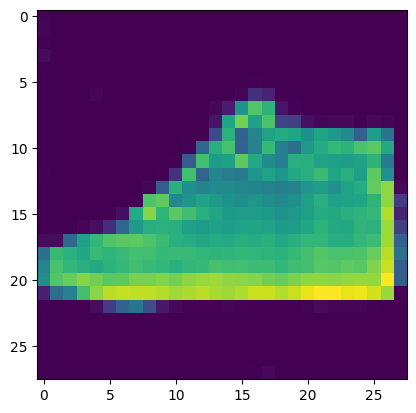

Iteration: 2
Prob of each classes [[-51.922356 -48.36413  -83.67026  -38.080425 -34.724304 -32.004677
  -37.839672  52.726986 -56.36872   15.142247]]
prediction:  7


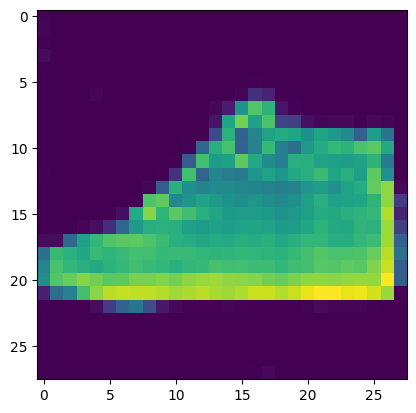

Iteration: 3
Prob of each classes [[-53.48976  -49.003357 -84.3815   -39.85244  -34.113747 -31.947668
  -38.920784  46.78526  -53.305775  19.266865]]
prediction:  7


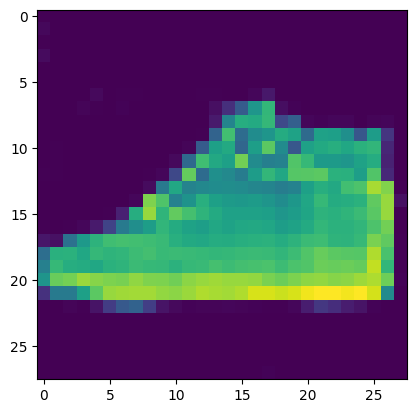

Iteration: 4
Prob of each classes [[-53.48976  -49.003357 -84.3815   -39.85244  -34.113747 -31.947668
  -38.920784  46.78526  -53.305775  19.266865]]
prediction:  7


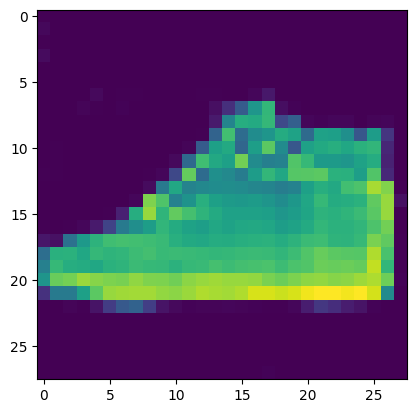

Iteration: 5
Prob of each classes [[-48.68989  -48.301678 -85.79573  -39.141605 -38.59607  -34.66823
  -38.740177  38.959354 -61.026825  24.29978 ]]
prediction:  7


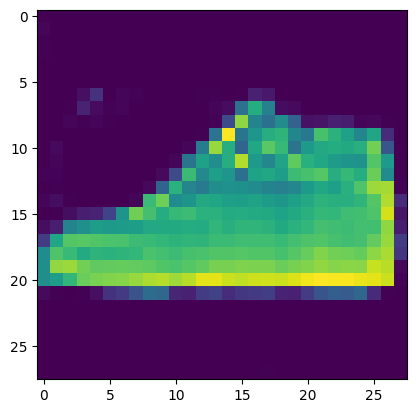

Iteration: 6
Prob of each classes [[-48.5556   -47.929554 -86.81842  -38.88763  -39.08435  -35.296043
  -38.63469   38.83739  -59.780838  24.054644]]
prediction:  7


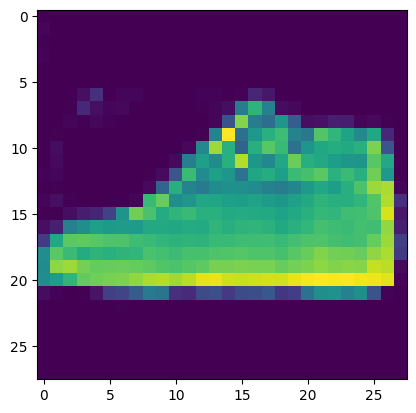

Iteration: 7
Prob of each classes [[-47.762363 -49.563606 -88.8248   -38.99382  -38.98732  -37.829514
  -38.419613  41.522053 -59.582268  23.624544]]
prediction:  7


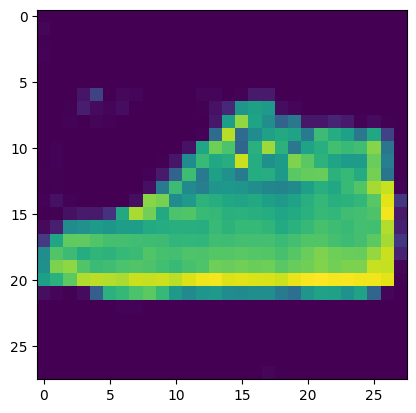

Iteration: 8
Prob of each classes [[-47.873226 -49.67092  -87.02309  -39.30502  -38.7305   -36.608902
  -38.711     37.802242 -57.811745  24.2868  ]]
prediction:  7


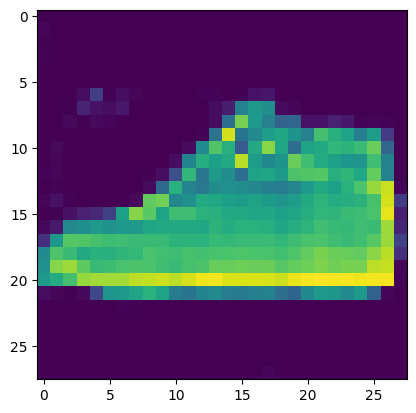

Iteration: 9
Prob of each classes [[-49.141018 -47.27726  -88.94862  -34.266987 -39.025978 -44.59616
  -38.5222    15.898205 -57.137745  38.343666]]
prediction:  9


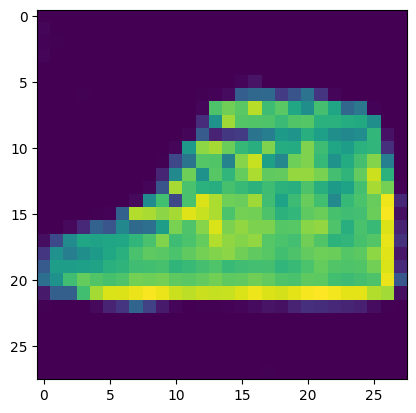

Iteration: 10
Prob of each classes [[-50.685383 -48.814518 -85.89473  -35.201347 -39.076233 -45.858406
  -39.359665  20.270103 -54.708473  36.25509 ]]
prediction:  9


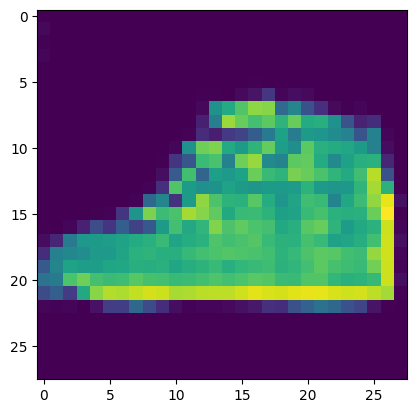

Iteration: 11
Prob of each classes [[-55.028214 -52.49759  -84.24912  -38.955647 -35.987144 -43.744766
  -35.921867  14.654846 -56.46048   40.822277]]
prediction:  9


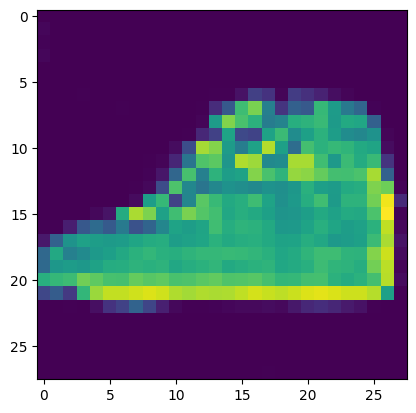

Iteration: 12
Prob of each classes [[-50.184776 -54.985588 -83.01212  -37.89499  -38.576187 -45.243813
  -35.020397  10.43973  -63.152287  44.24519 ]]
prediction:  9


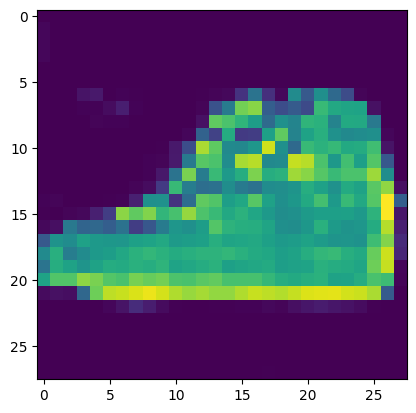

Iteration: 13
Prob of each classes [[-49.280693 -50.635674 -88.898766 -39.59585  -39.74987  -44.96572
  -38.93475   31.759714 -54.360863  30.991732]]
prediction:  7


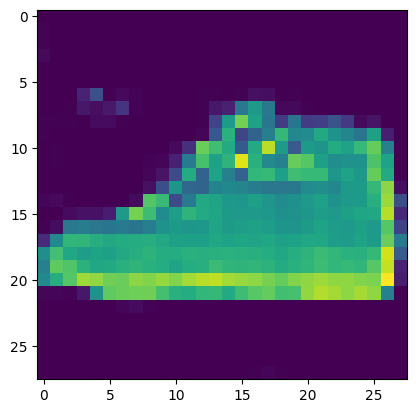

Iteration: 14
Prob of each classes [[-45.81924   -53.410233  -83.329926  -38.827717  -39.953033  -46.431633
  -32.845245    8.4520235 -61.501835   44.36494  ]]
prediction:  9


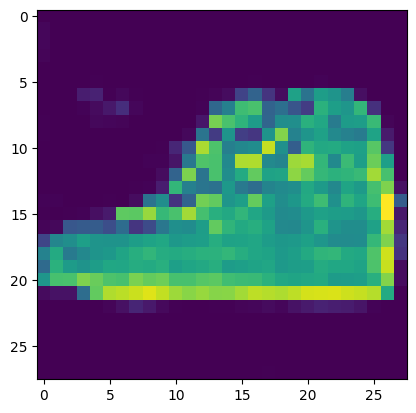

Iteration: 15
Prob of each classes [[-50.916286 -47.04294  -87.03583  -35.54825  -40.01303  -47.72142
  -33.28519    3.811348 -71.05938   46.018463]]
prediction:  9


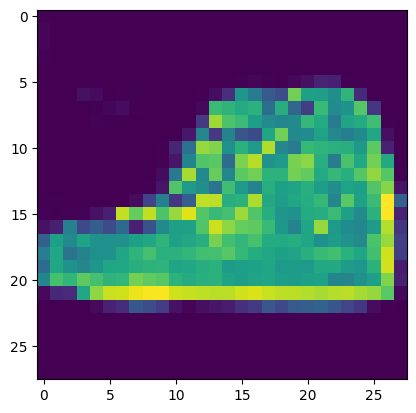

Iteration: 16
Prob of each classes [[-50.064    -41.36425  -90.01465  -42.25767  -43.31508  -48.64521
  -33.32046    4.311075 -70.300545  50.472595]]
prediction:  9


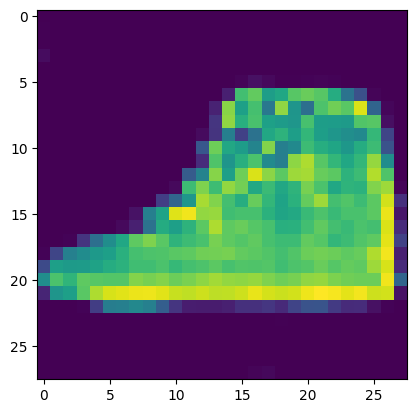

Iteration: 17
Prob of each classes [[-51.57913   -41.68943   -89.87324   -42.845108  -42.45067   -51.043793
  -35.343697    7.1531177 -70.53066    48.678318 ]]
prediction:  9


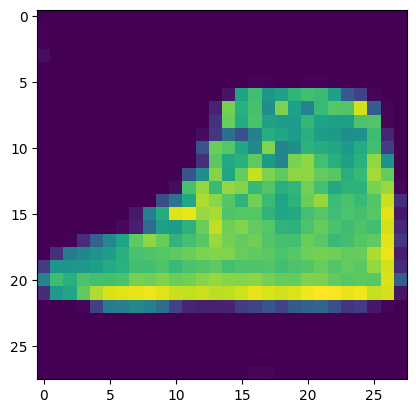

Iteration: 18
Prob of each classes [[-51.32947  -40.62584  -85.061035 -42.3642   -36.82955  -47.469574
  -29.993074  -4.580451 -61.98427   48.304092]]
prediction:  9


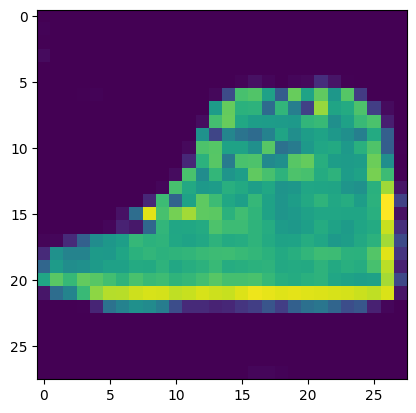

Iteration: 19
Prob of each classes [[-54.278553  -39.81878   -86.601074  -43.891705  -36.433884  -49.94805
  -28.920265   -2.9229627 -67.67037    48.431473 ]]
prediction:  9


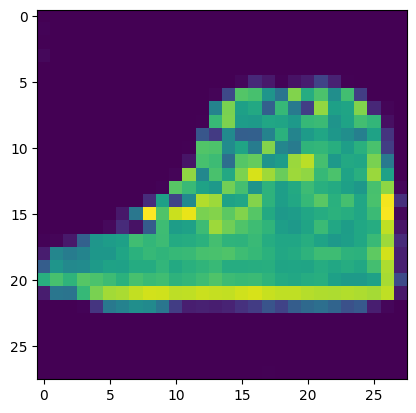

Iteration: 20
Prob of each classes [[-54.773174 -46.11255  -83.6696   -44.143173 -37.83584  -41.72071
  -29.973078  -5.701388 -66.33094   51.25166 ]]
prediction:  9


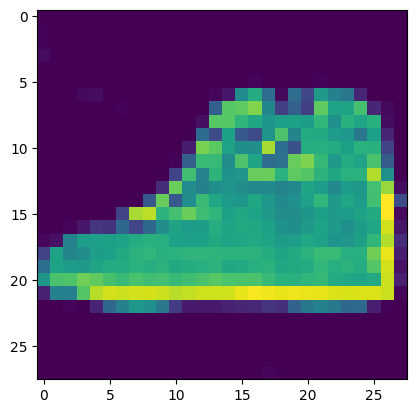

Iteration: 21
Prob of each classes [[-52.26006   -40.549194  -84.566475  -44.572105  -37.077156  -50.374176
  -30.008375   -4.5718484 -64.84588    48.86894  ]]
prediction:  9


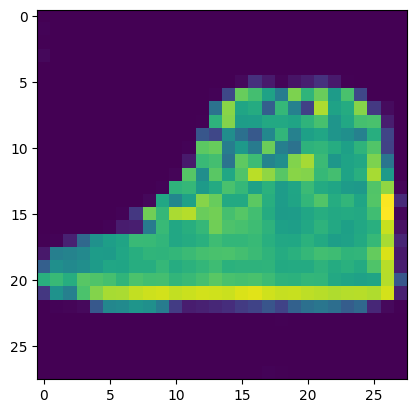

Iteration: 22
Prob of each classes [[-52.26006   -40.549194  -84.566475  -44.572105  -37.077156  -50.374176
  -30.008375   -4.5718484 -64.84588    48.86894  ]]
prediction:  9


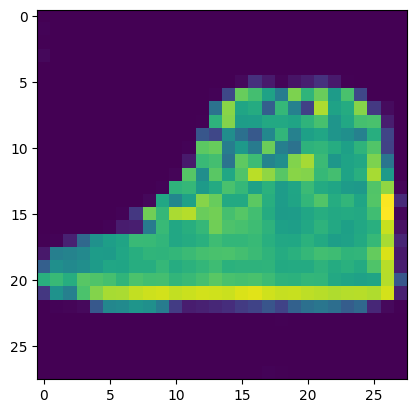

Iteration: 23
Prob of each classes [[-51.621876  -40.276733  -84.72601   -45.133568  -37.471146  -49.49388
  -30.15793    -6.4359565 -65.018745   49.70514  ]]
prediction:  9


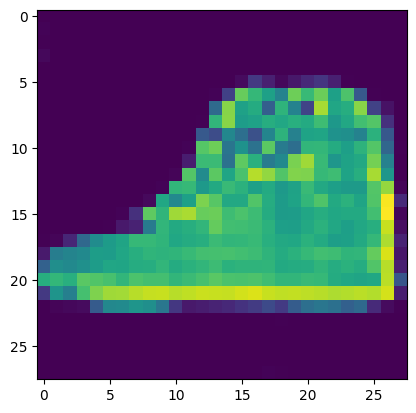

Iteration: 24
Prob of each classes [[-49.825798  -40.185333  -85.209595  -43.624958  -39.077827  -49.49205
  -30.289682   -3.3807511 -64.815285   49.53026  ]]
prediction:  9


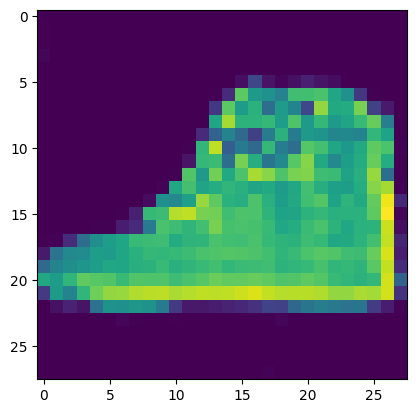

Iteration: 25
Prob of each classes [[-51.874012 -44.09719  -82.711494 -48.325565 -41.10572  -44.73784
  -34.74452  -15.729523 -70.690834  59.152546]]
prediction:  9


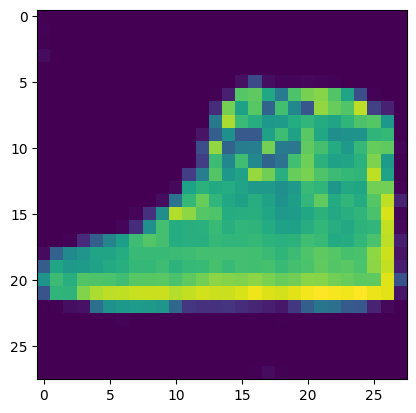

Iteration: 26
Prob of each classes [[-53.047924  -45.243393  -83.04124   -46.01818   -42.986572  -47.718437
  -35.06241    -7.8256097 -72.34144    57.56162  ]]
prediction:  9


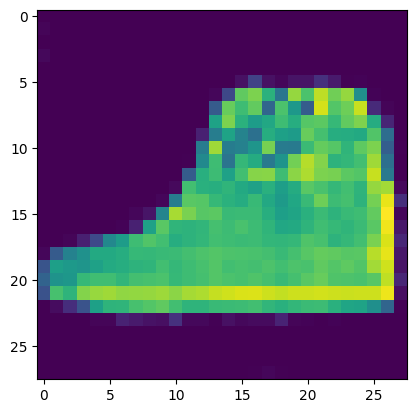

Iteration: 27
Prob of each classes [[-49.63433  -43.180195 -78.600494 -50.350563 -44.389626 -46.552696
  -37.87187  -15.02145  -71.18147   60.099846]]
prediction:  9


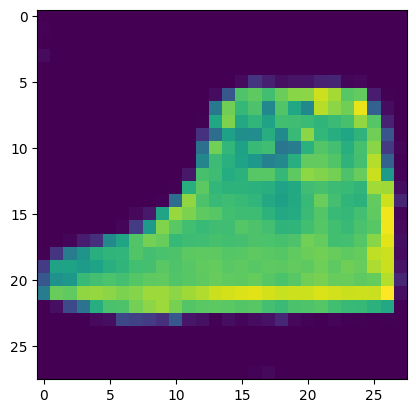

Iteration: 28
Prob of each classes [[-47.268143 -39.532516 -67.58779  -52.08665  -54.639206 -41.929382
  -43.64702  -20.78248  -81.546974  66.71966 ]]
prediction:  9


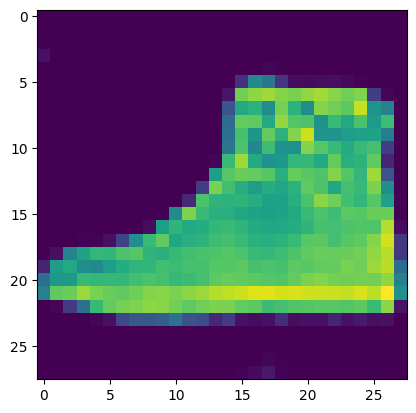

Iteration: 29
Prob of each classes [[-47.655933 -39.395313 -68.27491  -51.853863 -54.53385  -41.38259
  -43.687874 -20.634697 -82.61281   67.0128  ]]
prediction:  9


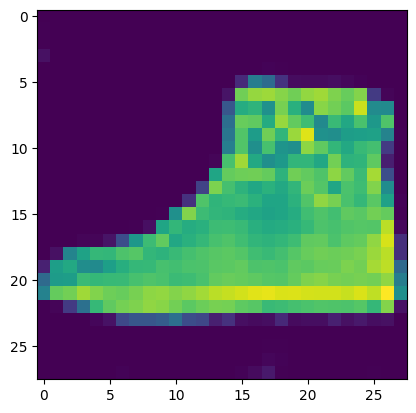

Iteration: 30
Prob of each classes [[-47.545887 -38.75016  -68.37151  -52.912148 -54.98575  -41.471222
  -44.0193   -21.685503 -82.412544  67.7221  ]]
prediction:  9


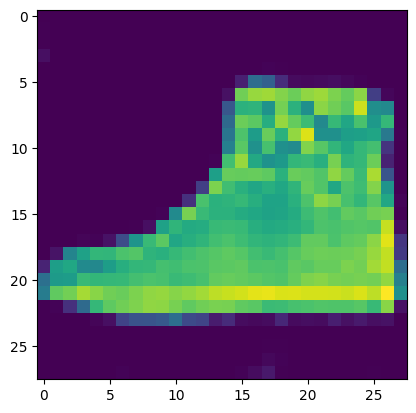

Iteration: 31
Prob of each classes [[-46.45403  -40.357456 -66.74341  -53.573105 -57.12361  -42.58786
  -45.70458  -23.801449 -81.12702   68.61518 ]]
prediction:  9


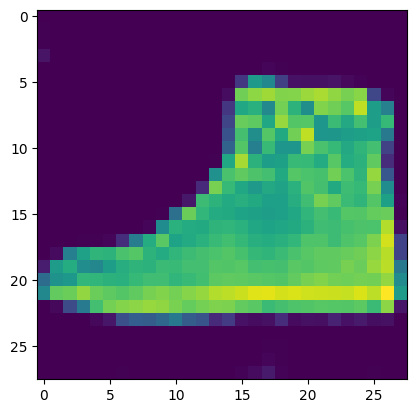

In [40]:
_, logic_list, pred_list = modifying_exceptional_features_each_step(df, int(target_class_fashion), query_x,
                                                                    cnn_Fashion, G_Fashion)

In [41]:
np_logic, np_pred= np.array(logic_list).squeeze(), np.array(pred_list)
np.savetxt('np_logic_fashion.csv', np_logic, delimiter=',')
np.savetxt('np_pred_fashion.csv', np_pred, delimiter=',')

In [4]:
filename = 'np_logic_fashion.csv'
np_logic = np.loadtxt(filename, delimiter=',')

In [5]:
np_prob  = np.zeros(np_logic.shape)

for i in range(len(np_logic)):
    exp_logic = np.exp(np_logic[i, :])
    np_prob[i] = exp_logic / np.sum(exp_logic) 
    
np_prob.shape

(31, 10)

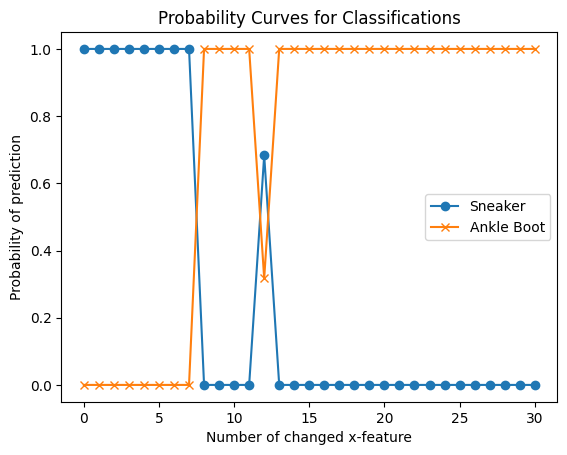

In [7]:
number_changed_x = np.arange(0, len(np_logic), 1)
plt.plot(number_changed_x, np_prob[:, 7], label=output_label(7), marker='o')
plt.plot(number_changed_x, np_prob[:, 9], label=output_label(9), marker='x')

plt.title('Probability Curves for Classifications')
plt.xlabel('Number of changed x-feature')
plt.ylabel('Probability of prediction')
plt.legend()

plt.show()